In [201]:
import pandas as pd
import matplotlib.pyplot as plt
import pywt
import numpy as np
from scipy.signal import cwt, ricker
import ast


In [3]:
two800_df_w = pd.read_csv('C:/Users/Miranda Córdova/Desktop/deep learning/STR/wavelet_3.csv',
                         usecols = ['Locus','Allele Name','Length','Repeat Sequence','Reads','Value','Sample','Allele_Name_Copy','Type','Reads_Value_Merged'],
                          dtype= {'Locus':'object','Allele Name':'object','Length': 'float64','Repeat Sequence':'object','Reads':'float64','Value': 'float64','Sample':'object','Allele_Name_Copy': 'object','Type': 'object','Reads_Value_Merged':'float'}
 )

In [4]:

def Walk_encode(short_read_line):
    mapping = {'G': 1, 'A': 1, 'T': -1, 'C': -1, 'N': 0}
    return np.array([mapping.get(base, 0) for base in short_read_line])

two800_df_w['Encoded Sequence'] = two800_df_w['Repeat Sequence'].apply(Walk_encode)


In [5]:
two800_df_w

,Locus,Allele Name,Length,Repeat Sequence,Reads,Value,Sample,Allele_Name_Copy,Type,Reads_Value_Merged,Encoded Sequence
0,Amelogenin,1,69.0,TAGTGGGTGGATTCTTCATCCCAAATAAAGTGGTTTCTCAAGTGGT...,57.0,0.0,2800M-1A1,1,A,57.0,"[-1, 1, 1, -1, 1, 1, 1, -1, 1, 1, 1, -1, -1, -..."
1,Amelogenin,0,63.0,TAGTGTGTTGATTCTTTATCCCAGATGTTTCTCAAGTGGTCCTGAT...,45.0,0.0,2800M-1A1,0,A,45.0,"[-1, 1, 1, -1, 1, -1, 1, -1, -1, 1, 1, -1, -1,..."
2,Amelogenin,0,63.0,TAGTGTGTTGATTTTTTATCCCAGATGTTTCTCAAGTGGTCCTGAT...,1.0,0.0,2800M-1A1,0,NaN,1.0,"[-1, 1, 1, -1, 1, -1, 1, -1, -1, 1, 1, -1, -1,..."
3,Amelogenin,1,69.0,TAGTGGGTGGATTCTTAATCCCAAATAAAGTGGTTTCTCAAGTGGT...,1.0,0.0,2800M-1A1,1,NaN,1.0,"[-1, 1, 1, -1, 1, 1, 1, -1, 1, 1, 1, -1, -1, -..."
4,Amelogenin,1,69.0,TAGTGGGTGGATTCTTCATCCCAAATAAAGTGGTTTCTCAAGTGGT...,1.0,0.0,2800M-1A1,1,NaN,1.0,"[-1, 1, 1, -1, 1, 1, 1, -1, 1, 1, 1, -1, -1, -..."
...,...,...,...,...,...,...,...,...,...,...,...
224840,Y-GATA-H4,11,120.0,CCATCTATCTATCTATTCATCCATCTAATCTATCCATTCTATCTAT...,1.0,0.0,2800M-18.7e,11,NaN,1.0,"[-1, -1, 1, -1, -1, -1, 1, -1, -1, -1, 1, -1, ..."
224841,Y-GATA-H4,10,116.0,CTATCTATCTATTCATCCATCTAATCTATCCATTCTATCTATCTAT...,1.0,0.0,2800M-18.7e,10,NaN,1.0,"[-1, -1, 1, -1, -1, -1, 1, -1, -1, -1, 1, -1, ..."
224842,Y-GATA-H4,11,120.0,CTATCTATCTATCTATTAATCCATCTAATCTATCCATTCTATCTAT...,1.0,0.0,2800M-18.7e,11,NaN,1.0,"[-1, -1, 1, -1, -1, -1, 1, -1, -1, -1, 1, -1, ..."
224843,Y-GATA-H4,9,112.0,CTATCTATCTATCTATTCATCCATCTAATCTATCCATTCTATCTAT...,1.0,0.0,2800M-18.7e,9,NaN,1.0,"[-1, -1, 1, -1, -1, -1, 1, -1, -1, -1, 1, -1, ..."


In [6]:
# Get unique values in the 'Locus' column
unique_loci = two800_df_w['Locus'].unique()

print("Unique Loci:")
print(unique_loci)


Unique Loci:
['Amelogenin' 'CSF1PO' 'D10S1248' 'D12S391' 'D13S317' 'D16S539' 'D17S1301'
 'D18S51' 'D19S433' 'D1S1656' 'D20S482' 'D21S11' 'D22S1045' 'D2S1338'
 'D2S441' 'D3S1358' 'D4S2408' 'D5S818' 'D6S1043' 'D7S820' 'D8S1179'
 'D9S1122' 'DXS10074' 'DXS10103' 'DXS10135' 'DXS7132' 'DXS7423' 'DXS8378'
 'DYF387S1' 'DYS19' 'DYS385' 'DYS389I' 'DYS389II' 'DYS390' 'DYS391'
 'DYS392' 'DYS437' 'DYS438' 'DYS439' 'DYS448' 'DYS460' 'DYS461' 'DYS481'
 'DYS505' 'DYS522' 'DYS533' 'DYS549' 'DYS570' 'DYS576' 'DYS612' 'DYS635'
 'DYS643' 'FGA' 'HPRTB' 'PentaD' 'PentaE' 'TH01' 'TPOX' 'vWA' 'Y-GATA-H4']


In [217]:

def filter_and_concat_specific_loci(df, target_loci, chunk_size=1000, file_name='Input_scalogram_rep.csv'):
    all_chunks = []

    # Iterate over  loci
    for locus in target_loci:
        # Filter for the specific Locus
        filtered_df = df[df['Locus'] == locus]

        # Iterate over rows in the filtered DataFrame
        for _, row in filtered_df.iterrows():
            encoded_sequence = np.fromstring(row['Encoded Sequence'][1:-1], sep=',')  # Convert array string to NumPy array
            chunks = [encoded_sequence[i:i + chunk_size].tolist() for i in range(0, len(encoded_sequence), chunk_size)]

            # Add locus information to each chunk
            locus_chunks = [{'Encoded Sequence': chunk} for chunk in chunks]
            all_chunks.extend(locus_chunks)

    # Create a DataFrame with 'Locus' and 'Sequence Chunk' columns
    result_df = pd.DataFrame(all_chunks)

    # Save to the specified CSV file
    result_df.to_csv(file_name, index=False)

# Example usage:
target_loci = ['Y-GATA-H4', 'DYS643', 'CSF1PO', 'Amelogenin']
filter_and_concat_specific_loci(two800_df_w, target_loci)


C:\Users\Miranda Córdova\AppData\Local\Temp\ipykernel_28868\20831189.py:11: DeprecationWarning: string or file could not be read to its end due to unmatched data; this will raise a ValueError in the future.
  encoded_sequence = np.fromstring(row['Encoded Sequence'][1:-1], sep=',')  # Convert array string to NumPy array


In [172]:

# Set the seed for reproducibility
np.random.seed(42)

# Define the possible DNA bases
bases = ['A', 'T', 'C', 'G']

# Generate a random array of size 543,000 with bases sampled uniformly
random_dna_array = np.random.choice(bases, size=543000, replace=True)

# Convert the array to a string if needed
random_dna = ''.join(random_dna_array)

# Chunk size
chunk_size = 1000

# Create chunks of 1000 data points
chunks = [random_dna[i:i+chunk_size] for i in range(0, len(random_dna), chunk_size)]

# Define Walk_encode function
def Walk_encode(short_read_line):
    mapping = {'G': 1, 'A': 1, 'T': -1, 'C': -1, 'N': 0}
    return np.array([mapping.get(base, 0) for base in short_read_line])

# Encode each chunk using Walk_encode
encoded_chunks = [Walk_encode(chunk) for chunk in chunks]

# Create a DataFrame with 'Encoded Sequence' column
result_df = pd.DataFrame({'Encoded Sequence': encoded_chunks})

# Save to a CSV file
result_df.to_csv('Input_scalogram_random.csv', index=False)


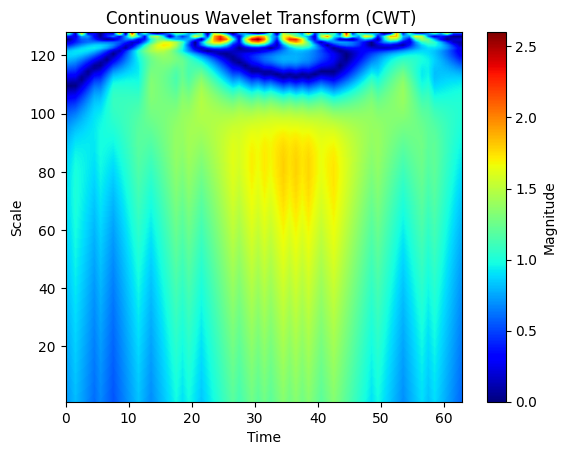

In [208]:

from scipy.signal import cwt, ricker

sequence = result_df.loc[1, 0]
wavelet_widths = np.arange(1, 128)
wavelet = ricker

# Compute the Continuous Wavelet Transform (CWT)
cwt_matrix = cwt(sequence, wavelet, wavelet_widths)

# Plot the scaleogram
plt.imshow(np.abs(cwt_matrix), aspect='auto', extent=[0, len(sequence), 1, 128], cmap='jet', interpolation='bilinear')
plt.colorbar(label='Magnitude')
plt.title('Continuous Wavelet Transform (CWT) ')
plt.xlabel('Time')
plt.ylabel('Scale')
plt.show()


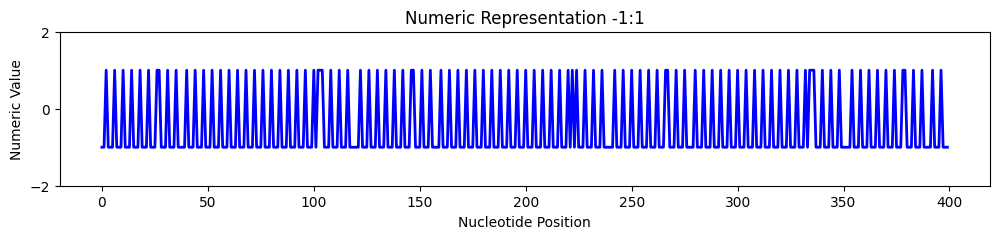

In [32]:

dna_sequence = array_Ygatah4[:400]

# Plot the numeric representation of the DNA sequence
plt.figure(figsize=(12, 2))
plt.plot(range(len(dna_sequence)), dna_sequence, color='blue', linewidth=2)
plt.yticks([-2, 0, 2])  # Set y-axis ticks to -2, 0, and 2
#plt.xticks(range(len(dna_sequence)), sequence, rotation=90)
plt.title('Numeric Representation -1:1')
plt.xlabel('Nucleotide Position')
plt.ylabel('Numeric Value')
plt.show()


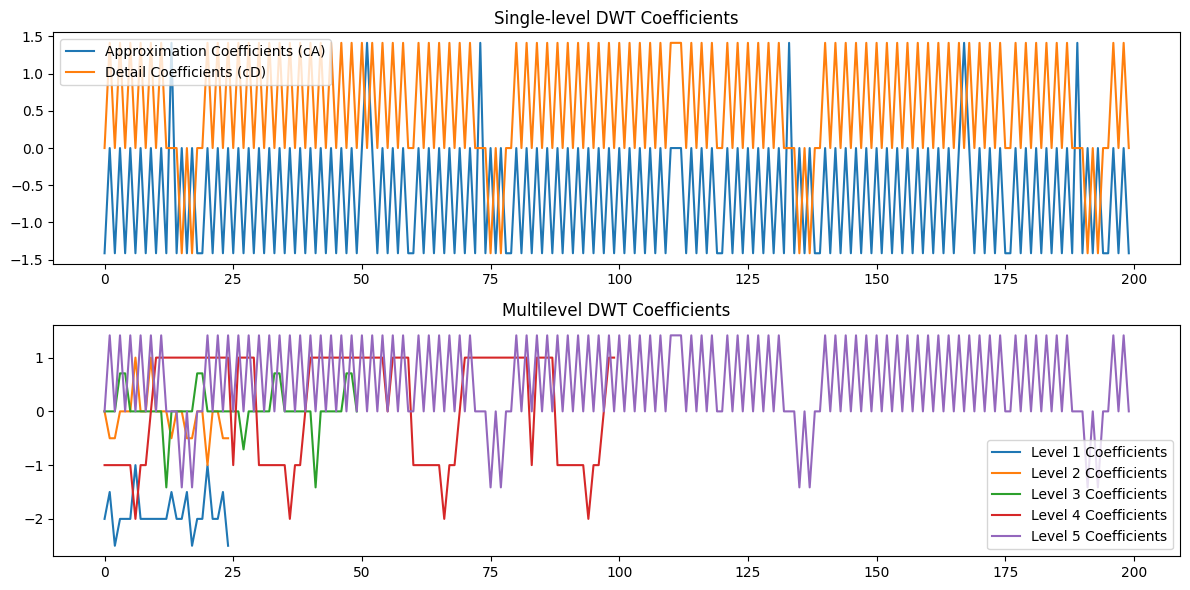

In [33]:
def plot_dwt_coefficients(data, wavelet, mode, level):
    # Single-level DWT
    cA, cD = pywt.dwt(data, wavelet, mode=mode)

    # Multilevel DWT
    coeffs = pywt.wavedec(data, wavelet, mode=mode, level=level)

    # Plotting
    plt.figure(figsize=(12, 6))

    # Plot Single-level DWT coefficients
    plt.subplot(2, 1, 1)
    plt.plot(cA, label='Approximation Coefficients (cA)')
    plt.plot(cD, label='Detail Coefficients (cD)')
    plt.title('Single-level DWT Coefficients')
    plt.legend()

    # Plot Multilevel DWT coefficients
    plt.subplot(2, 1, 2)
    for i, coeff in enumerate(coeffs):
        plt.plot(coeff, label=f'Level {i + 1} Coefficients')

    plt.title('Multilevel DWT Coefficients')
    plt.legend()
    plt.tight_layout()
    plt.show()


# Plot DWT coefficients
plot_dwt_coefficients(dna_sequence, 'haar', mode='symmetric', level=4)

In [34]:
max_level = pywt.dwt_max_level(len(dna_sequence), 'haar')
print (max_level)
coeffs = pywt.wavedec(dna_sequence, 'haar', level=max_level)

8


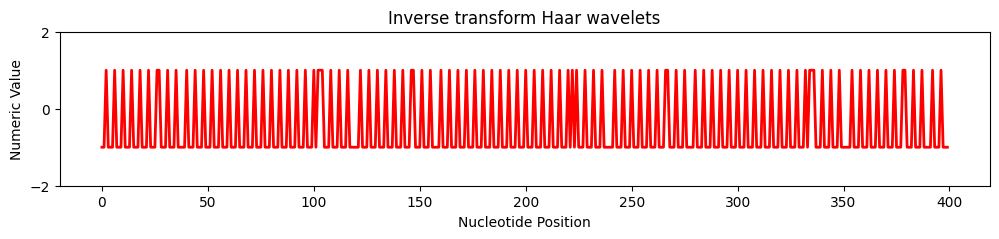

In [35]:
inverse_coefficients = pywt.waverec(coeffs, 'haar')
plt.figure(figsize=(12, 2))
plt.plot(range(len(inverse_coefficients)), inverse_coefficients, color='red', linewidth=2)
plt.yticks([-2, 0, 2])  # Set y-axis ticks to -2, 0, and 2

plt.title('Inverse transform Haar wavelets')
plt.xlabel('Nucleotide Position')
plt.ylabel('Numeric Value')
plt.show()

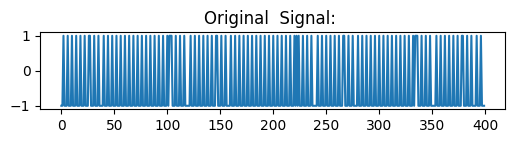

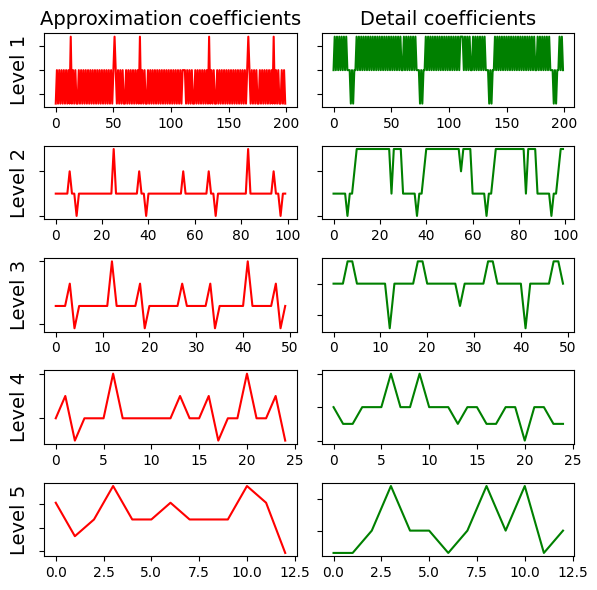

In [36]:
fig, ax = plt.subplots(figsize=(6,1))
ax.set_title("Original  Signal: ")
ax.plot(dna_sequence)
plt.show()

data = dna_sequence
waveletname = 'haar'

fig, axarr = plt.subplots(nrows=5, ncols=2, figsize=(6,6))
for ii in range(5):
    (data, coeff_d) = pywt.dwt(data, waveletname)
    axarr[ii, 0].plot(data, 'r')
    axarr[ii, 1].plot(coeff_d, 'g')
    axarr[ii, 0].set_ylabel("Level {}".format(ii + 1), fontsize=14, rotation=90)
    axarr[ii, 0].set_yticklabels([])
    if ii == 0:
        axarr[ii, 0].set_title("Approximation coefficients", fontsize=14)
        axarr[ii, 1].set_title("Detail coefficients", fontsize=14)
    axarr[ii, 1].set_yticklabels([])
plt.tight_layout()
plt.show()